In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
pd.options.display.max_columns = 100

from matplotlib import pyplot as plt
import numpy as np

import seaborn as sns

import pylab as plot

Importing training dataset

In [2]:
data = pd.read_csv('./train.csv')

In [3]:
print(data.shape)

(867873, 10)


In [4]:
data.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y', 'Id'],
      dtype='object')

Splitting the "Dates" into date and time

In [ ]:
df=data
datetime=df.Dates.str.split(pat=" ",expand=True)
datetime.columns=['Date','Time']
#datetime

In [ ]:
Date=datetime.Date.str.split(pat="-",expand=True)
Date.columns=['Year','Month','Day']

Time=datetime.Time.str.split(pat=":",expand=True)
Time.columns=['Hour','Minute','Second']

Dropping the column of "Dates" and appending the dataframe "datetime"

In [ ]:
df=pd.concat([df,Date,Time],axis=1)
#df

In [ ]:
df=df.drop(labels=['Dates'],axis=1)


# Checking Dependencies

In [ ]:
df.columns

Between Date and Category

In [ ]:
df.head()

In [ ]:
Crime_type=df.Category.unique()
Crime_type.size

36 Crime Category are there 

In [ ]:
Crime_type

In [ ]:
df.Year.unique().size

In [ ]:
#-----------------calculating percentage of crimes--------------

crime_count=df.Category.value_counts()

for i in range(0,36):
    print(Crime_type[i],((crime_count[i]/df.Category.value_counts().sum())*100),"%")

#-----------------plotting graph------------
num=36
data.Category.value_counts()[:num].plot(kind='bar',figsize=(10,10))
plt.legend()

In [15]:
df.Category.value_counts()

LARCENY/THEFT                  172952
OTHER OFFENSES                 124736
NON-CRIMINAL                    91266
ASSAULT                         75987
DRUG/NARCOTIC                   53365
VEHICLE THEFT                   53146
VANDALISM                       44183
WARRANTS                        41729
BURGLARY                        36326
SUSPICIOUS OCC                  31051
MISSING PERSON                  25689
ROBBERY                         22723
FRAUD                           16507
FORGERY/COUNTERFEITING          10484
SECONDARY CODES                  9872
WEAPON LAWS                      8459
PROSTITUTION                     7411
TRESPASS                         7248
STOLEN PROPERTY                  4491
SEX OFFENSES FORCIBLE            4339
DISORDERLY CONDUCT               4279
DRUNKENNESS                      4223
RECOVERED VEHICLE                3102
KIDNAPPING                       2318
DRIVING UNDER THE INFLUENCE      2250
RUNAWAY                          1916
LIQUOR LAWS 

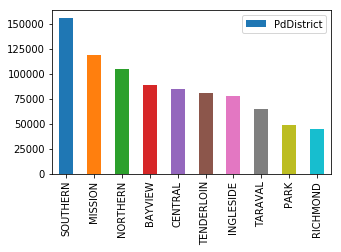

In [16]:
data.PdDistrict.value_counts().plot(kind='bar',label='PdDistrict',figsize=(5,3))
plt.legend()

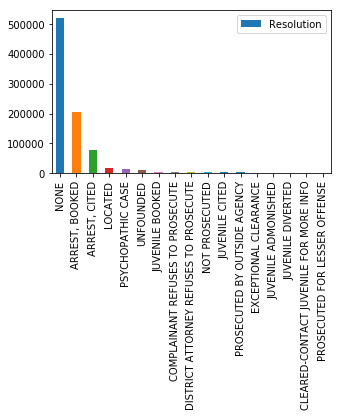

In [17]:
df.Resolution.value_counts().plot(kind='bar',label='Resolution',figsize=(5,3))
plt.legend()

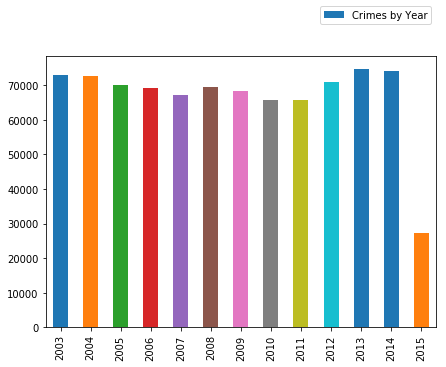

In [18]:
df.Year.value_counts().sort_index().plot(kind='bar',label='Crimes by Year',figsize=(7,5))
plt.legend()
plt.legend(bbox_to_anchor=(1,1.2))

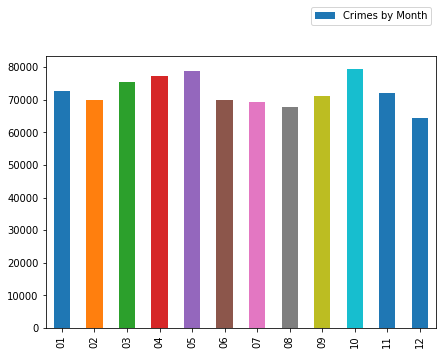

In [19]:
df.Month.value_counts().sort_index().plot(kind='Bar',label='Crimes by Month',figsize=(7,5))
plt.legend(bbox_to_anchor=(1,1.2))

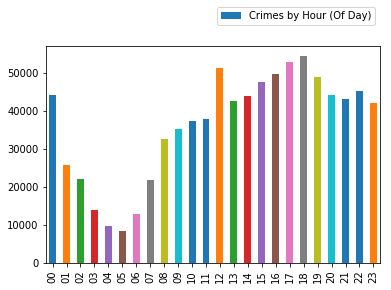

In [20]:
df.Hour.value_counts().sort_index().plot(kind='bar',label='Crimes by Hour (Of Day)')
plt.legend(bbox_to_anchor=(1,1.2))

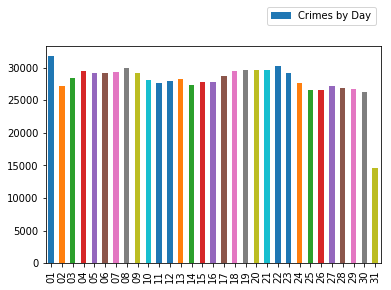

In [21]:
df.Day.value_counts().sort_index().plot(kind='bar',label='Crimes by Day')
plt.legend(bbox_to_anchor=(1,1.2))

In [22]:
"""Survived = df[df.Category=='SEX OFFENSES FORCIBLE']['Year'].value_counts()
Died =df[df.Category=='LIQUOR LAWS']['Year'].value_counts()
df_sex = pd.DataFrame([Survived , Died])
df_sex.index = ['Survived','Died']
df_sex.plot(kind='head',stacked=True, figsize=(5,3), title="Survived/Died by Sex")
"""

'Survived = df[df.Category==\'SEX OFFENSES FORCIBLE\'][\'Year\'].value_counts()\nDied =df[df.Category==\'LIQUOR LAWS\'][\'Year\'].value_counts()\ndf_sex = pd.DataFrame([Survived , Died])\ndf_sex.index = [\'Survived\',\'Died\']\ndf_sex.plot(kind=\'head\',stacked=True, figsize=(5,3), title="Survived/Died by Sex")\n'

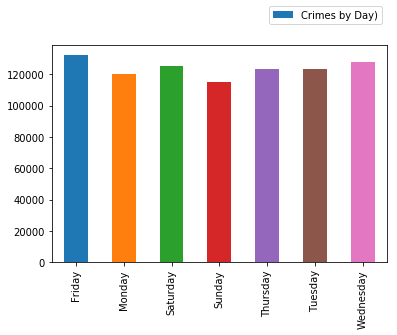

In [22]:
df.DayOfWeek.value_counts().sort_index().plot(kind='bar',label='Crimes by Day)')
plt.legend(bbox_to_anchor=(1,1.2))

In [49]:
s=df.groupby(by=['Category','Hour']).count()

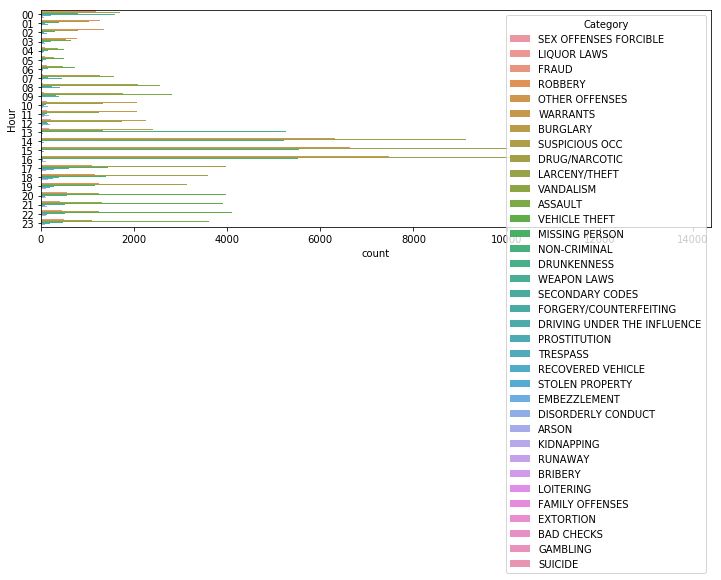

In [14]:
plt.figure(figsize=(12,4))
sns.countplot(y="Hour",hue="Category",data=df)

In [15]:
plt.figure(figsize=(12,4))
sns.violinplot(y="Category",hue="Hour",data=df)


TypeError: unsupported operand type(s) for /: 'str' and 'int'

<Figure size 864x288 with 0 Axes>

In [52]:
s

Descript  DayOfWeek  PdDistrict  Resolution  Address     X  \
Category    Hour                                                               
ARSON       00         100        100         100         100      100   100   
            01          86         86          86          86       86    86   
            02          99         99          99          99       99    99   
            03          91         91          91          91       91    91   
            04          97         97          97          97       97    97   
            05          61         61          61          61       61    61   
            06          45         45          45          45       45    45   
            07          35         35          35          35       35    35   
            08          32         32          32          32       32    32   
            09          29         29          29          29       29    29   
            10          46         46          46          46       46    46   
            11          35         35          35          35       35    35   
            12          39         39          39          39       39    39   
            13          44         44          44          44       44    44   
            14          51         51          51          51       51    51   
            15          50         50          50          50       50    50   
            16          46         46          46          46       46    46   
            17          51         51          51          51       51    51   
            18          55         55          55          55       55    55   
            19          66         66          66          66       66    66   
            20          83         83          83          83       83    83   
            21          69         69          69          69       69    69   
            22          94         94          94          94       94    94   
            23          94         94          94          94       94    94   
ASSAULT     00        4241       4241        4241        4241     4241  4241   
            01        3745       3745        3745        3745     3745  3745   
            02        3415       3415        3415        3415     3415  3415   
            03        1722       1722        1722        1722     1722  1722   
            04        1042       1042        1042        1042     1042  1042   
            05         819        819         819         819      819   819   
...                    ...        ...         ...         ...      ...   ...   
WARRANTS    18        2465       2465        2465        2465     2465  2465   
            19        2143       2143        2143        2143     2143  2143   
            20        1678       1678        1678        1678     1678  1678   
            21        1672       1672        1672        1672     1672  1672   
            22        2019       2019        2019        2019     2019  2019   
            23        1849       1849        1849        1849     1849  1849   
WEAPON LAWS 00         408        408         408         408      408   408   
            01         318        318         318         318      318   318   
            02         311        311         311         311      311   311   
            03         159        159         159         159      159   159   
            04         112        112         112         112      112   112   
            05          59         59          59          59       59    59   
            06         102        102         102         102      102   102   
            07         153        153         153         153      153   153   
            08         243        243         243         243      243   243   
            09         319        319         319         319      319   319   
            10         307        307         307         307      307   307   
            11    